In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import json

In [4]:
# Study data files
estimated_crimes_path = "estimated_crimes.csv"

# Read the  data and the study results
estimated_crimes = pd.read_csv(estimated_crimes_path)

estimated_crimes

,year,state_abbr,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,caveats
0,1995,NaN,262803276,1798792,21606,97470,NaN,580509,1099207,12063935,2593784,7997710,1472441,NaN
1,1996,NaN,265228572,1688540,19645,96252,NaN,535594,1037049,11805323,2506400,7904685,1394238,NaN
2,1997,NaN,267783607,1636099,18211,96153,NaN,498534,1023201,11558975,2461026,7743760,1354189,NaN
3,1998,NaN,270248003,1533887,16974,93144,NaN,447186,976583,10951827,2332735,7376311,1242781,NaN
4,1999,NaN,272690813,1426044,15522,89411,NaN,409371,911740,10208334,2100739,6955520,1152075,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,2012,WY,576626,1161,14,154,NaN,61,932,13222,2125,10513,584,NaN
1140,2013,WY,583223,1212,17,144,NaN,74,917,12809,1956,10275,578,NaN
1141,2014,WY,584304,1142,16,127,204.0,53,899,11477,1689,9185,603,NaN
1142,2015,WY,586555,1300,16,171,124.0,59,1054,11151,1762,8797,592,NaN


In [5]:
estimated_crimes_2006 = estimated_crimes[estimated_crimes['year'] >= int('2006')]
estimated_crimes_2006_09 = estimated_crimes_2006[estimated_crimes_2006['year'] <= int('2009')]
estimated_crimes_2006_09

,year,state_abbr,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,caveats
11,2006,NaN,299398484,1435123,17309,94472,NaN,449246,874096,10019601,2194993,6626363,1198245,NaN
12,2007,NaN,301621157,1422970,17128,92160,NaN,447324,866358,9882212,2190198,6591542,1100472,NaN
13,2008,NaN,304059724,1394461,16465,90750,NaN,443563,843683,9774152,2228887,6586206,959059,NaN
14,2009,NaN,307006550,1325896,15399,89241,NaN,408742,812514,9337060,2203313,6338095,795652,NaN
33,2006,AL,4599030,19553,382,1646,NaN,7062,10463,181249,44780,121451,15018,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,2009,WI,5654774,14650,146,1118,NaN,4904,8482,147692,26813,111947,8932,NaN
1133,2006,WY,515004,1307,13,151,NaN,72,1071,15381,2322,12255,804,NaN
1134,2007,WY,522830,1344,21,172,NaN,84,1067,15053,2365,11875,813,NaN
1135,2008,WY,532668,1330,12,185,NaN,87,1046,14515,2198,11584,733,NaN


In [6]:
crime_rates_06_09 = estimated_crimes_2006_09.drop(columns = ['rape_revised', 'caveats'], axis = 1)
crime_rates_06_09 = crime_rates_06_09.dropna()

crime_rates_06_09





,year,state_abbr,population,violent_crime,homicide,rape_legacy,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft
33,2006,AL,4599030,19553,382,1646,7062,10463,181249,44780,121451,15018
34,2007,AL,4627851,20775,412,1548,7398,11417,184082,45379,124465,14238
35,2008,AL,4661900,21110,351,1618,7346,11795,190416,50411,126539,13466
36,2009,AL,4708708,21194,322,1504,6265,13103,178007,48844,118072,11091
55,2006,AK,670053,4610,36,512,600,3462,23975,4155,17284,2536
...,...,...,...,...,...,...,...,...,...,...,...,...
1114,2009,WI,5654774,14650,146,1118,4904,8482,147692,26813,111947,8932
1133,2006,WY,515004,1307,13,151,72,1071,15381,2322,12255,804
1134,2007,WY,522830,1344,21,172,84,1067,15053,2365,11875,813
1135,2008,WY,532668,1330,12,185,87,1046,14515,2198,11584,733


In [7]:
crime_rates_06_09.groupby(['state_abbr', 'year']).mean()

population  violent_crime  homicide  rape_legacy  robbery  \
state_abbr year                                                              
AK         2006      670053           4610        36          512      600   
           2007      683478           4520        43          545      581   
           2008      686293           4475        27          447      645   
           2009      698473           4424        22          513      654   
AL         2006     4599030          19553       382         1646     7062   
...                     ...            ...       ...          ...      ...   
WV         2009     1819777           5554        84          470      914   
WY         2006      515004           1307        13          151       72   
           2007      522830           1344        21          172       84   
           2008      532668           1330        12          185       87   
           2009      544270           1196        11          172       78   

                 aggravated_assault  property_crime  burglary  larceny  \
state_abbr year                                                          
AK         2006                3462           23975      4155    17284   
           2007                3351           23096      3734    16929   
           2008                3356           20090      3237    15225   
           2009                3235           20538      3600    15251   
AL         2006               10463          181249     44780   121451   
...                             ...             ...       ...      ...   
WV         2009                4086           46215     12005    31453   
WY         2006                1071           15381      2322    12255   
           2007                1067           15053      2365    11875   
           2008                1046           14515      2198    11584   
           2009                 935           14243      2176    11310   

                 motor_vehicle_theft  
state_abbr year                       
AK         2006                 2536  
           2007                 2433  
           2008                 1628  
           2009                 1687  
AL         2006                15018  
...                              ...  
WV         2009                 2757  
WY         2006                  804  
           2007                  813  
           2008                  733  
           2009                  757  

[204 rows x 10 columns]

In [8]:
# Study data files
grad_rates_path = "GradRates.csv"

# Read the  data and the study results
grad_rates = pd.read_csv(grad_rates_path)

grad_rates

,Unnamed: 0,Year,State,LEAID,Total Dropouts,Dropout Enroll base,Droupout Rate,Diploma Count,AFGEB,AFGR,TOTOHC
0,0,2006-07,1,100002,0,0,-2.0,-1,-1,-1.0,-1
1,1,2006-07,1,100005,30,749,4.0,192,263,73.0,14
2,2,2006-07,1,100006,46,1209,3.8,216,456,47.4,28
3,3,2006-07,1,100007,45,2726,1.7,779,878,88.7,10
4,4,2006-07,1,100008,8,1968,0.4,562,576,97.6,10
...,...,...,...,...,...,...,...,...,...,...,...
73124,73124,2009-10,66,6600040,-1,-1,-1.0,-1,-1,-1.0,-1
73125,73125,2009-10,69,6900030,-1,-1,-1.0,-1,-1,-1.0,-1
73126,73126,2009-10,72,7200030,-9,145172,-9.0,25514,41984,60.8,-2
73127,73127,2009-10,78,7800002,144,2591,5.6,463,-2,-2.0,0


In [9]:
grad_rates = grad_rates.drop(columns = ['LEAID', 'AFGEB', 'AFGR', 'TOTOHC'], axis = 1)
grad_rates = grad_rates.drop(columns = ['Unnamed: 0'], axis = 1)
grad_rates


,Year,State,Total Dropouts,Dropout Enroll base,Droupout Rate,Diploma Count
0,2006-07,1,0,0,-2.0,-1
1,2006-07,1,30,749,4.0,192
2,2006-07,1,46,1209,3.8,216
3,2006-07,1,45,2726,1.7,779
4,2006-07,1,8,1968,0.4,562
...,...,...,...,...,...,...
73124,2009-10,66,-1,-1,-1.0,-1
73125,2009-10,69,-1,-1,-1.0,-1
73126,2009-10,72,-9,145172,-9.0,25514
73127,2009-10,78,144,2591,5.6,463


In [10]:
state_abbr = {
    1: 'AL',
    2: 'AK',
    60: 'AS',
    4: 'AZ',
    5: 'AR',
    6: 'CA',
    8: 'CO',
    9: 'CT',
    10: 'DE',
    11: 'DC',
    12: 'FL',
    13: 'GA',
    66: 'GU',
    15: 'HI',
    16: 'ID',
    17: 'IL',
    18: 'IN',
    19: 'IA',
    20: 'KS',
    21: 'KY',
    22: 'LA',
    23: 'ME',
    24: 'MD',
    25: 'MA',
    26: 'MI',
    27: 'MN',
    28: 'MS',
    29: 'MO',
    30: 'MT',
    31: 'NE',
    32: 'NV',
    33: 'NH',
    34: 'NJ',
    35: 'NM',
    36: 'NY',
    37: 'NC',
    38: 'ND',
    69:'MP',
    39: 'OH',
    40: 'OK',
    41: 'OR',
    42: 'PA',
    72: 'PR',
    44: 'RI',
    45: 'SC',
    46: 'SD',
    47: 'TN',
    48: 'TX',
    49: 'UT',
    50: 'VT',
    78: 'VI',
    51: 'VA',
    53: 'WA',
    54: 'WV',
    55: 'WI',
    56: 'WY'
}
pprint(state_abbr)


{1: 'AL',
 2: 'AK',
 4: 'AZ',
 5: 'AR',
 6: 'CA',
 8: 'CO',
 9: 'CT',
 10: 'DE',
 11: 'DC',
 12: 'FL',
 13: 'GA',
 15: 'HI',
 16: 'ID',
 17: 'IL',
 18: 'IN',
 19: 'IA',
 20: 'KS',
 21: 'KY',
 22: 'LA',
 23: 'ME',
 24: 'MD',
 25: 'MA',
 26: 'MI',
 27: 'MN',
 28: 'MS',
 29: 'MO',
 30: 'MT',
 31: 'NE',
 32: 'NV',
 33: 'NH',
 34: 'NJ',
 35: 'NM',
 36: 'NY',
 37: 'NC',
 38: 'ND',
 39: 'OH',
 40: 'OK',
 41: 'OR',
 42: 'PA',
 44: 'RI',
 45: 'SC',
 46: 'SD',
 47: 'TN',
 48: 'TX',
 49: 'UT',
 50: 'VT',
 51: 'VA',
 53: 'WA',
 54: 'WV',
 55: 'WI',
 56: 'WY',
 60: 'AS',
 66: 'GU',
 69: 'MP',
 72: 'PR',
 78: 'VI'}


In [11]:
grad_rates['state_abbr'] = grad_rates['State'].map(state_abbr)
grad_rates


,Year,State,Total Dropouts,Dropout Enroll base,Droupout Rate,Diploma Count,state_abbr
0,2006-07,1,0,0,-2.0,-1,AL
1,2006-07,1,30,749,4.0,192,AL
2,2006-07,1,46,1209,3.8,216,AL
3,2006-07,1,45,2726,1.7,779,AL
4,2006-07,1,8,1968,0.4,562,AL
...,...,...,...,...,...,...,...
73124,2009-10,66,-1,-1,-1.0,-1,GU
73125,2009-10,69,-1,-1,-1.0,-1,MP
73126,2009-10,72,-9,145172,-9.0,25514,PR
73127,2009-10,78,144,2591,5.6,463,VI


In [12]:
grad_rates = grad_rates[grad_rates['Total Dropouts'] >= 0]
grad_rates = grad_rates[grad_rates['Dropout Enroll base'] >= 0]
grad_rates = grad_rates[grad_rates['Droupout Rate'] >= 0]
grad_rates = grad_rates[grad_rates['Diploma Count'] >= 0]
grad_rates

,Year,State,Total Dropouts,Dropout Enroll base,Droupout Rate,Diploma Count,state_abbr
1,2006-07,1,30,749,4.0,192,AL
2,2006-07,1,46,1209,3.8,216,AL
3,2006-07,1,45,2726,1.7,779,AL
4,2006-07,1,8,1968,0.4,562,AL
7,2006-07,1,19,317,6.0,70,AL
...,...,...,...,...,...,...,...
72900,2009-10,56,57,969,5.9,217,WY
72901,2009-10,56,5,100,5.0,19,WY
72906,2009-10,56,19,399,4.8,93,WY
73127,2009-10,78,144,2591,5.6,463,VI


In [13]:
grad_rates.groupby(['state_abbr', 'Year']).mean()

State  Total Dropouts  Dropout Enroll base  Droupout Rate  \
state_abbr Year                                                                 
AK         2006-07    2.0       84.888889           885.638889      10.963889   
           2007-08    2.0       85.942857          1149.542857      10.197143   
           2008-09    2.0       72.050000          1006.875000       8.642500   
           2009-10    2.0       86.312500          1191.031250      10.306250   
AL         2006-07    1.0       41.325000          1332.325000       3.558333   
...                   ...             ...                  ...            ...   
WV         2009-10   54.0       92.761905          1799.333333       4.871429   
WY         2006-07   56.0       33.825000           494.800000       6.697500   
           2007-08   56.0       32.820513           648.897436       3.679487   
           2008-09   56.0        7.900000           689.066667       1.493333   
           2009-10   56.0       45.400000           688.666667       8.006667   

                    Diploma Count  
state_abbr Year                    
AK         2006-07     204.611111  
           2007-08     212.942857  
           2008-09     194.525000  
           2009-10     237.968750  
AL         2006-07     309.658333  
...                           ...  
WV         2009-10     384.142857  
WY         2006-07     125.475000  
           2007-08     132.307692  
           2008-09     143.700000  
           2009-10     148.000000  

[194 rows x 5 columns]

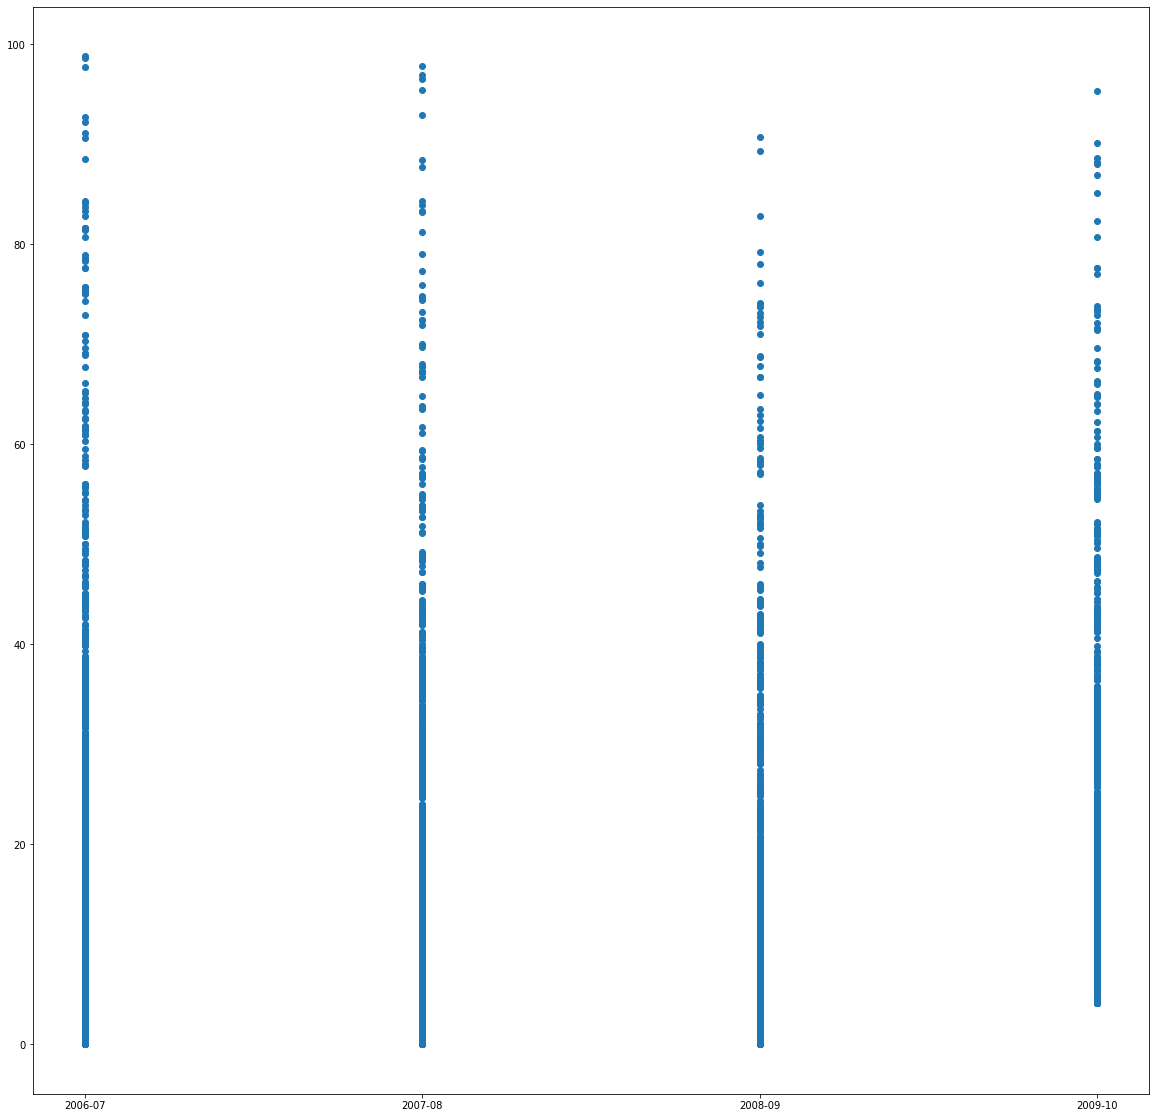

In [16]:

plt.figure(figsize =(20,20))
plt.scatter(grad_rates["Year"],grad_rates["Droupout Rate"])


In [ ]:
US_gradrate_avg =US_gradrate.groupby(US_gradrate["state_abbr"]).mean()
US_gradrate_avg.reset_index(inplace = True)
US_gradrate_avg